[[ 72.49  139.75 ]
 [ 72.455 139.75 ]]
[[ 70.455 139.75 ]
 [ 70.42  139.75 ]]


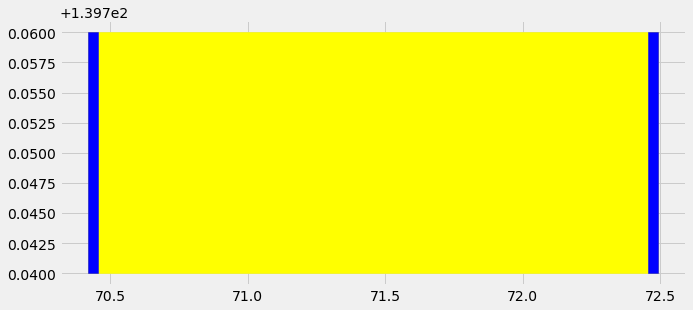

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.preprocessing import normalize

style.use('fivethirtyeight')


def plotline(axis,p1,p2,colorx="white"):
    A=np.array([p1,p2])
    axis.arrow(A[0][0],A[0][1],A[1][0]-A[0][0],A[1][1]-A[0][1],width=0.02,color=colorx,
               head_length=0.0,head_width=0.0)

    



def splitinthemiddle(point1,point2,gap):
    
    inverse=np.array([0,0])-np.array(point1)
    v=np.array([point1,point2])
    v=v+inverse
    
    dist = np.linalg.norm(v[0]-v[1])
    
    n1=(((dist-gap)/2/dist)*v)
    n1=n1-n1[0]
    
    n2=(((dist+gap)/2/dist)*v)
    n2=n2-n2[0]
    
    return [n1-inverse,np.array([n2[1],v[1]])-inverse]


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(212)

point1 = [72.49, 139.75 ]
point2 = [70.42, 139.75]

#point1 = [10, 5]
#point2 = [10,1]





plotline(ax0,point1,point2, colorx="yellow")


for line in splitinthemiddle(point1,point2,2):
    plotline(ax0,line[0],line[1], colorx="blue")
    
    print(line)


plt.show()


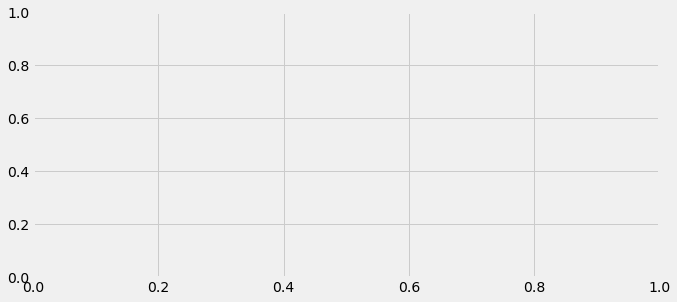

In [13]:
import re
import argparse
import math
import numpy as np


class CutRepeater:
    def __init__(self, passes, needsupport=False):
        self.passes = passes
        self.needsupport = needsupport

    def __call__(self, value):
        if self.needsupport:
            return addears(value,self.needsupport["gap"])
        
def lineinfo(p1,p2):
    gap=2
    length=math.sqrt(math.pow(p1["x"]-p2["x"],2)+math.pow(p1["y"]-p2["y"],2))
    if length==0:
        return {"len": 0, "proc": 0, "p1": p1, "p2": p2}
    proc=gap/length
    return {"len":length,"proc":proc,"p1":p1,"p2":p2}


def splitinthemiddle(point1, point2, gap):
    inverse = np.array([0, 0]) - np.array(point1)
    v = np.array([point1, point2])
    v = v + inverse

    dist = np.linalg.norm(v[0] - v[1])

    n1 = (((dist - gap) / 2 / dist) * v)
    n1 = n1 - n1[0]

    n2 = (((dist + gap) / 2 / dist) * v)
    n2 = n2 - n2[0]

    return [n1 - inverse, np.array([n2[1], v[1]]) - inverse]

def findLongestLine(points):

    maxlen=False
    prevpoint=False
    i=0
    for p in points:
        i=i+1
        if not "x" in p:
            continue
        if not prevpoint:
            prevpoint=p
            continue
        linfo=lineinfo(prevpoint,p)
        prevpoint=p
        if not maxlen:
            maxlen=linfo
        if maxlen["len"]<linfo["len"]:
            maxlen=linfo
            maxlen["lenauslen"]=i-1
    return maxlen


def addears(match,gap):
    block=match.group(1)

    lines=[]
    pattern = re.compile('(.*)(X(\\d+\\.*\\d*))*\\s*(Y(\\d+\\.*\\d*))*\\s*(F\\d+)*')
    pattern_getX=re.compile('X(\d+\.*\d*)')
    pattern_getY = re.compile('Y(\d+\.*\d*)')
    pattern_getS0 = re.compile('S0')
    pattern_getSON = re.compile('S(\d+)')

    points=[]
    i=0
    oldX=0
    oldY=0
    maxX=-1000
    minX=1000
    maxY=-1000
    minY=1000

    minYLine=-1
    minXLine=-1
    maxYLine=-1
    minYLine=-1
    originallines=block.split("\n")

    i=0
    laseron=False
    for line in originallines:
        i = i + 1
        aX=pattern_getX.search(line)
        aY = pattern_getY.search(line)
        aL=pattern_getS0.search(line)
        aLO = pattern_getSON.search(line)
        if aLO:
            if int(aLO.group(1))>0:
                laseron=True
        if aL:
            laseron=False
        if not laseron or (not aX and not aY):
            points.append({"linenr": i - 1})
        else:
            if aX:
                newX = float(aX.group(1))
            else:
                newX = oldX
            if aY:
                newY = float(aY.group(1))
            else:
                newY = oldY
            points.append({"x":newX,"y":newY, "linenr":(i-1)})

    lline=findLongestLine(points)

    if lline:

        a = np.array([lline["p1"]["x"], lline["p1"]["y"]])
        b = np.array([lline["p2"]["x"], lline["p2"]["y"]])

        # dist = np.linalg.norm(a-b)

        # mpx=lline["p1"]["x"]
        # mpy=lline["p1"]["y"]

        # mp2x=lline["p2"]["x"]
        # mp2y=lline["p2"]["y"]

        supportsplit = splitinthemiddle(a, b, gap)

        mpx = supportsplit[0][1][0]
        mpy = supportsplit[0][1][1]

        mp2x = supportsplit[1][0][0]
        mp2y = supportsplit[1][0][1]



    newdata=""
    i=0
    line=""
    for line in originallines:
        i = i + 1
        newdata += line + "\n"
        if lline and (i-1)== lline["p1"]["linenr"]:
            a = np.array([lline["p1"]["x"], lline["p1"]["y"]])
            b = np.array([lline["p2"]["x"], lline["p2"]["y"]])
            A=np.array([a,b])
            ax0.arrow(A[0][0],A[0][1],A[1][0]-A[0][0],A[1][1]-A[0][1],width=0.02,color="yellow",
               head_length=0.0,head_width=0.0)
            #newdata = newdata + "(addedblock start)\n" + "X" + str(mpx) + " Y" + str(mpy) +"\nS0\nX"+str(mp2x)+" Y"+str(mp2y)+"\nS900\n(added block end)\n"
            A=np.array([[mpx,mpy],[mp2x,mp2y]])
            ax0.arrow(A[0][0],A[0][1],A[1][0]-A[0][0],A[1][1]-A[0][1],width=0.02,color="blue",
               head_length=0.0,head_width=0.0)

        
            

    return newdata



with open("/home/szerr/git/svgtodxfcnc3040/svgtools/tmp/LA410-complettTree.Glas.01/3f321af00d34f76cd30ce8d6f179d667LA410-complettTree.Glas.01.Schnitt.svg.gcode") as fp:
    data = fp.read()
    fp.close()
    #print(data)
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(212)

rptr=CutRepeater(1,{"gap":10,"strength":300})
data = re.sub('^((G0.*)\nS([1-9]+\\d*)(((.*)\n)+?S0))', rptr, data, flags=re.MULTILINE)


   
    
